# To visualise data analysis in banking for ML models:

Using libraries such as Matplotlib, Seaborn, Plotly

### In this lesson, we will try to give answers to a set of questions that may be relevant when analyzing banking data:

What are the most useful Python libraries for visual analysis?
How to build interactive plots?
How to visualize single features?
How to do a visual analysis for the feature interaction?
How to provide a comprehensive visual analysis for numerical and categorical features?

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VDA_Banking_L2/bank-additional.zip

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot


In [8]:
pd.options.display.float_format = '{:.2f}'.format

In [9]:
df = pd.read_csv('c:/Users/rtran/OneDrive/Desktop/VS/New Projects/Bank_Data_Visualization/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [16]:
d = {"no": 0, "yes":1}
df["y"] = df["y"].map(d)

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [18]:
df.shape

(41188, 21)

# Matplotlib

<Axes: >

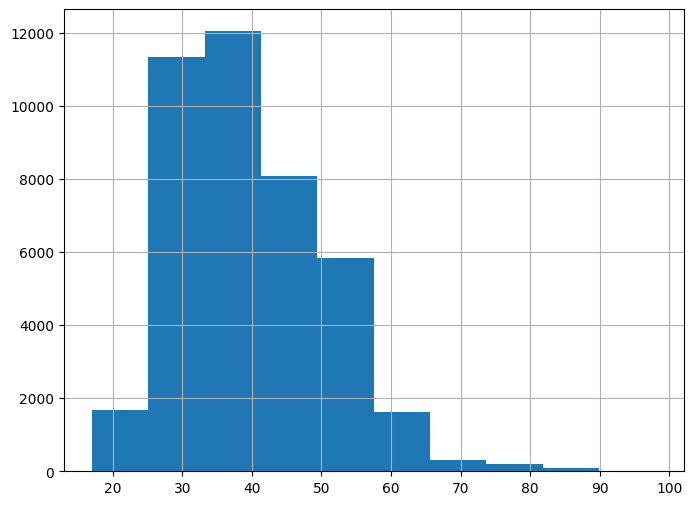

In [19]:
df["age"].hist()

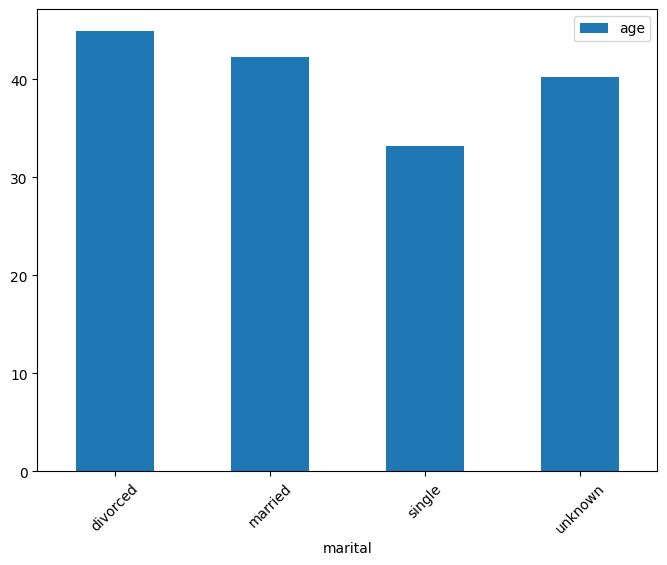

In [25]:
df[["age","marital"]].groupby("marital").mean().plot(kind="bar", rot=45);

# Seaborn

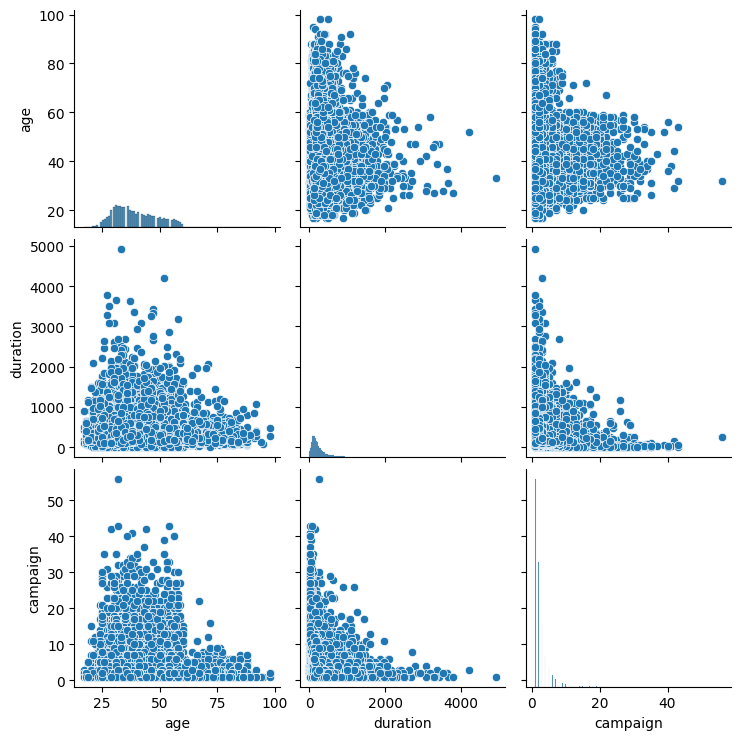

In [28]:
sns.pairplot(df[["age", "duration", "campaign"]])

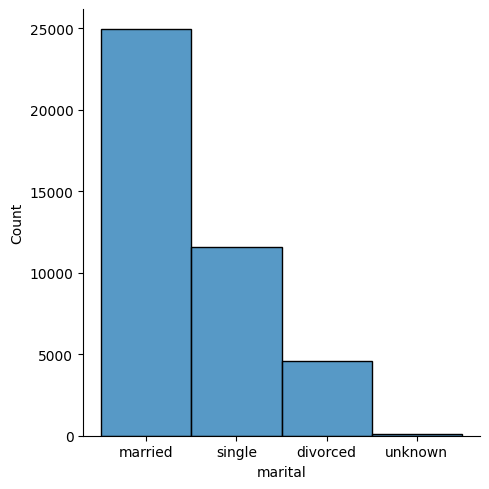

In [30]:
sns.displot(df.marital);

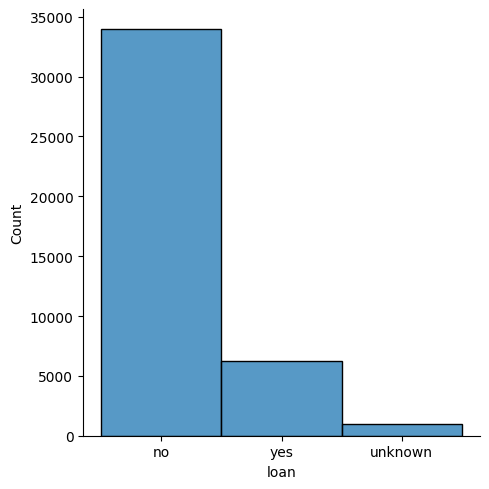

In [ ]:
sns.displot(df.loan);

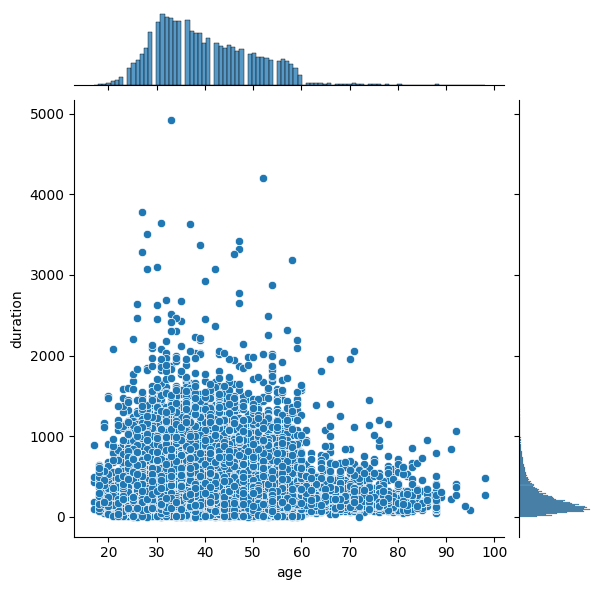

In [33]:
sns.jointplot(x="age", y="duration", data=df, kind="scatter")

<Axes: xlabel='age', ylabel='job'>

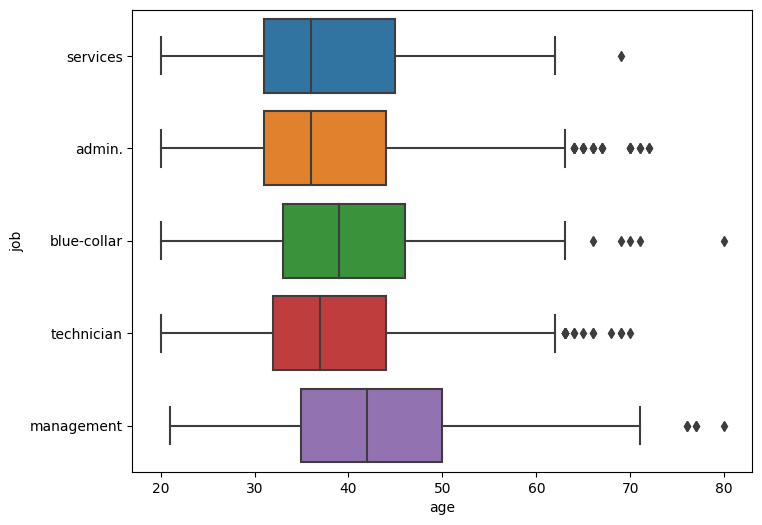

In [ ]:
top_jobs = (
    df.job.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="job", x="age", data=df[df.job.isin(top_jobs)], orient="h"
)

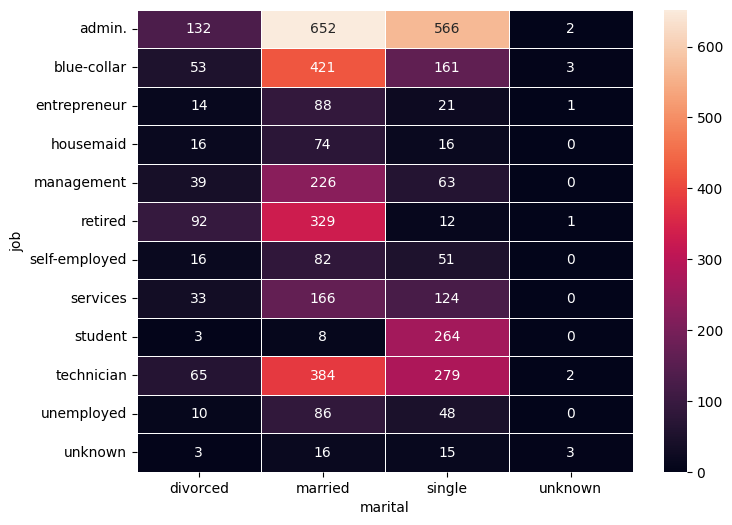

In [44]:
job_marital_y = (
    df.pivot_table(
        index="job", columns="marital", values="y", aggfunc=sum
    )
)
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.5);

# Plotly

In [46]:
age_df = (
    df.groupby("age")[["y"]].sum()
    .join(df.groupby("age")[["y"]].count(), rsuffix='_count')
)

age_df.columns = ["Attracted", "Total Number"]

In [47]:
trace0 = go.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted")
trace1 = go.Scatter(x=age_df.index, y=age_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Statistics by client age"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [48]:
month_index = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
month_df = (
    df.groupby("month")[["y"]]
    .sum()
    .join(df.groupby("month")[["y"]].count(), rsuffix='_count')
).reindex(month_index)
month_df.columns = ["Attracted", "Total Number"]

In [49]:
trace0 = go.Bar(x=month_df.index, y=month_df["Attracted"], name="Attracted")
trace1 = go.Bar(x=month_df.index, y=month_df["Total Number"], name="Total Number")

data = [trace0, trace1]
layout = {"title": "Share of months"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

<Axes: >

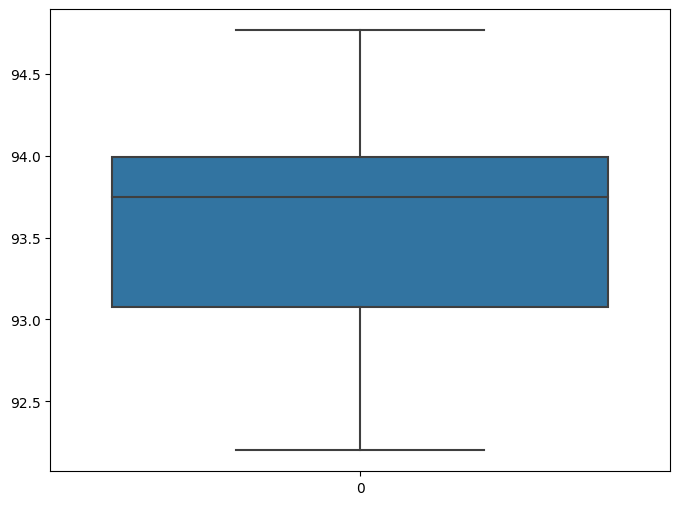

In [50]:
sns.boxplot(df["cons.price.idx"])

array([[<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>],
       [<Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>]], dtype=object)

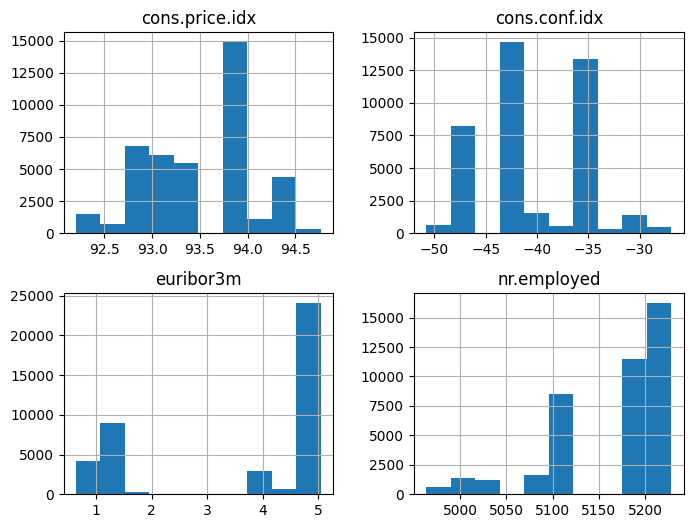

In [60]:
feat = ["cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

df[feat].hist()

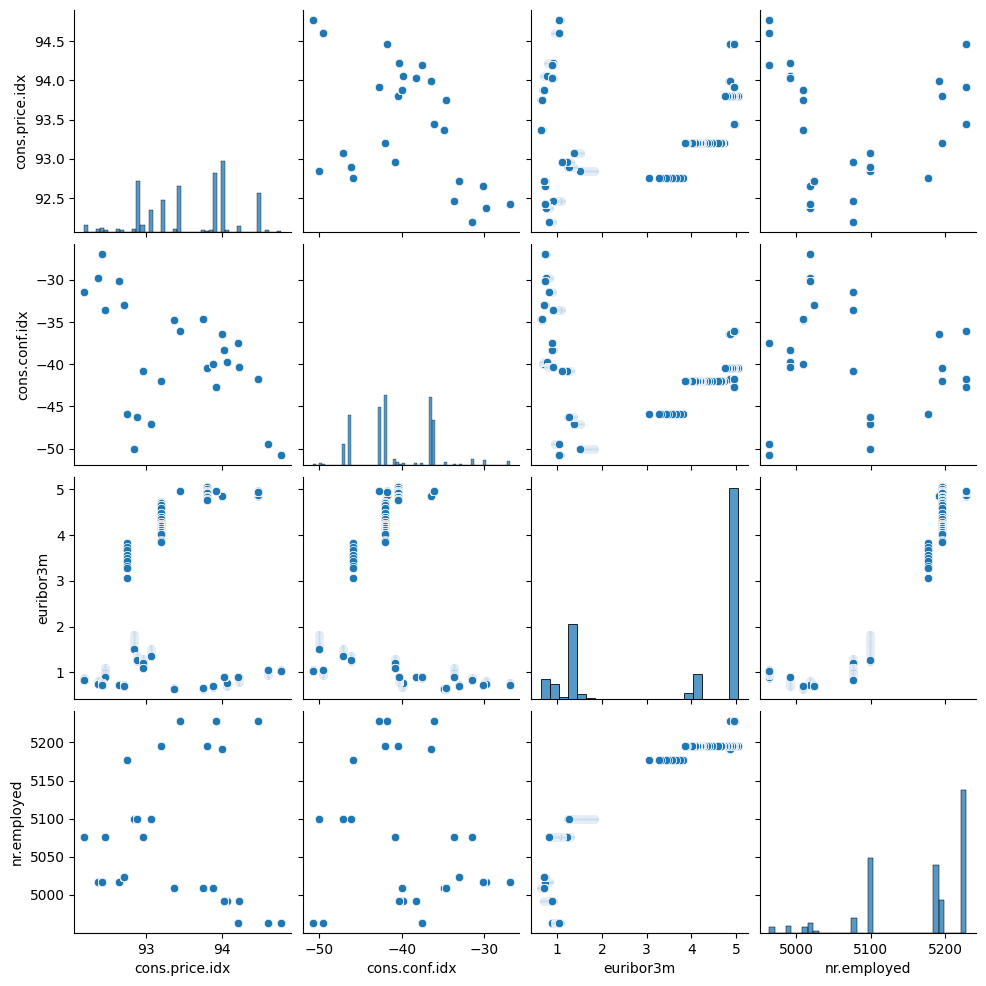

In [61]:
sns.pairplot(df[feat])

<Axes: xlabel='marital', ylabel='age'>

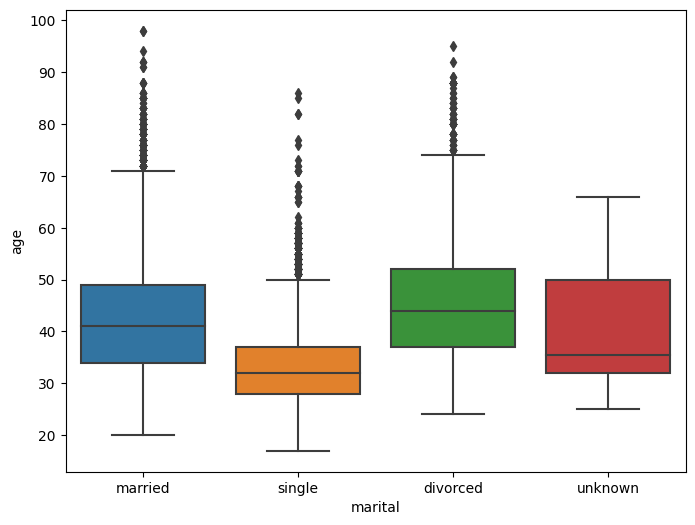

In [63]:
sns.boxplot(x="marital", y="age", data = df)

In [64]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


<Axes: xlabel='month', ylabel='count'>

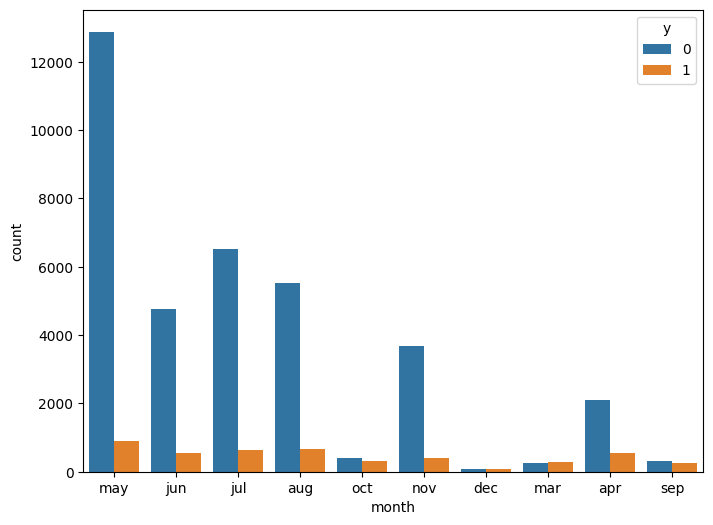

In [66]:
sns.countplot(x="month", hue="y", data=df)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

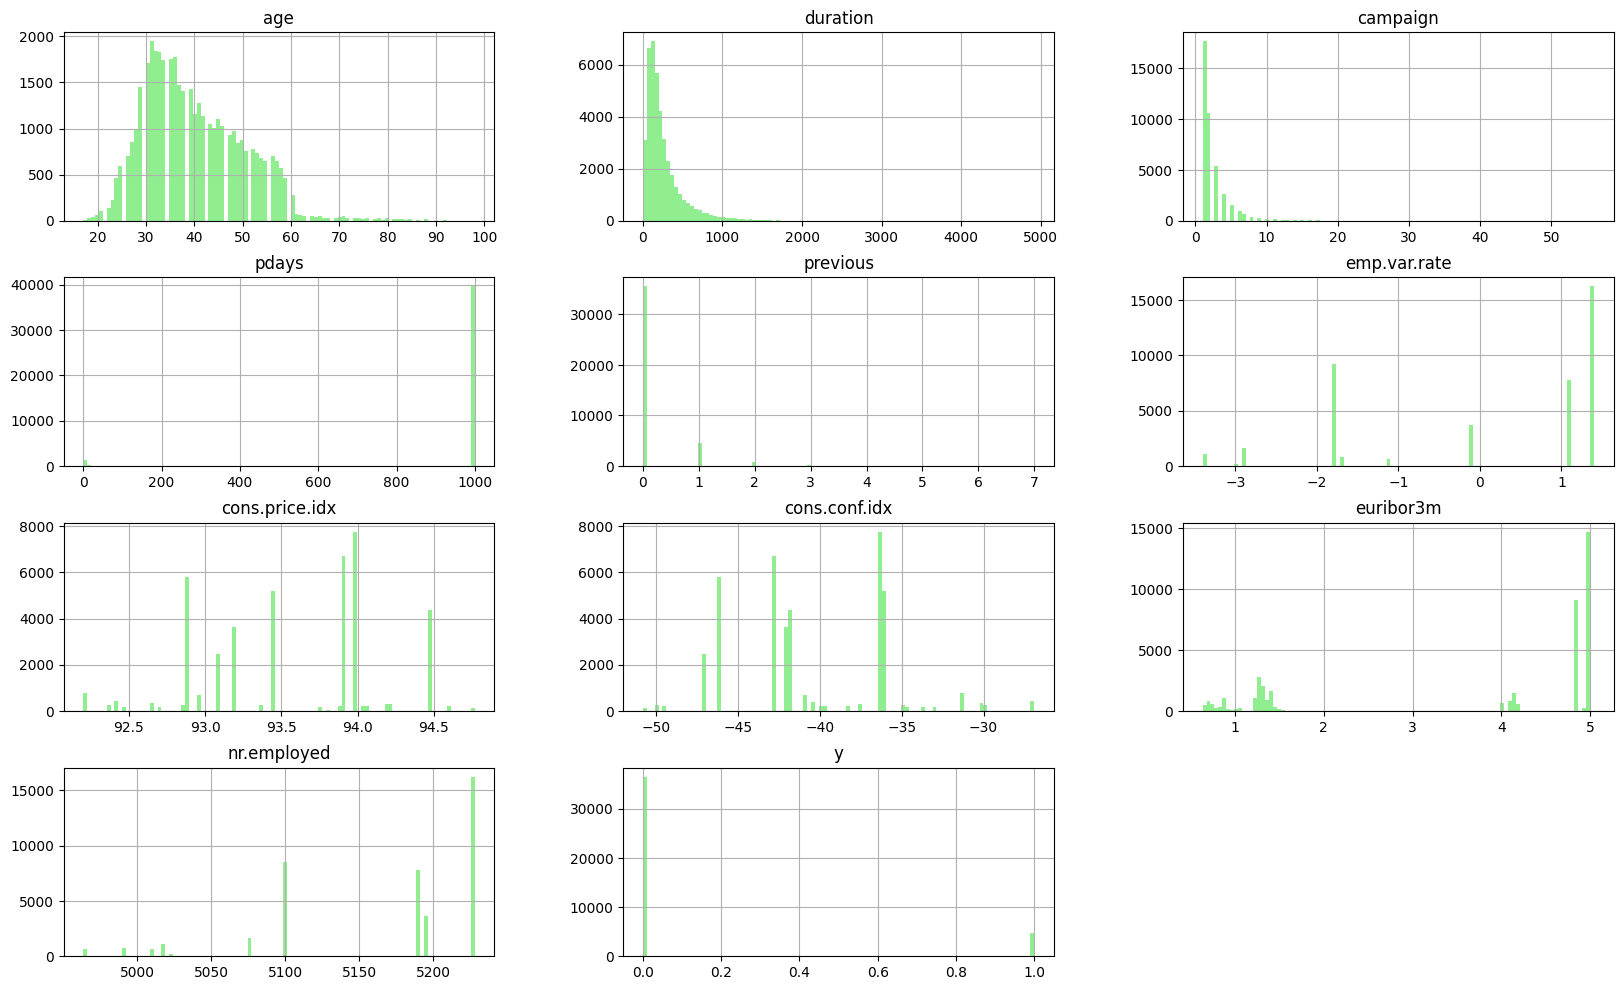

In [67]:
categorical = []
numerical = []
for feature in df.columns:
    if df[feature].dtype == object:
        categorical.append(feature)
    else:
        numerical.append(feature)

df[numerical].hist(figsize=(20,12), bins=100, color='lightgreen')

In [68]:
df.describe(include = ['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


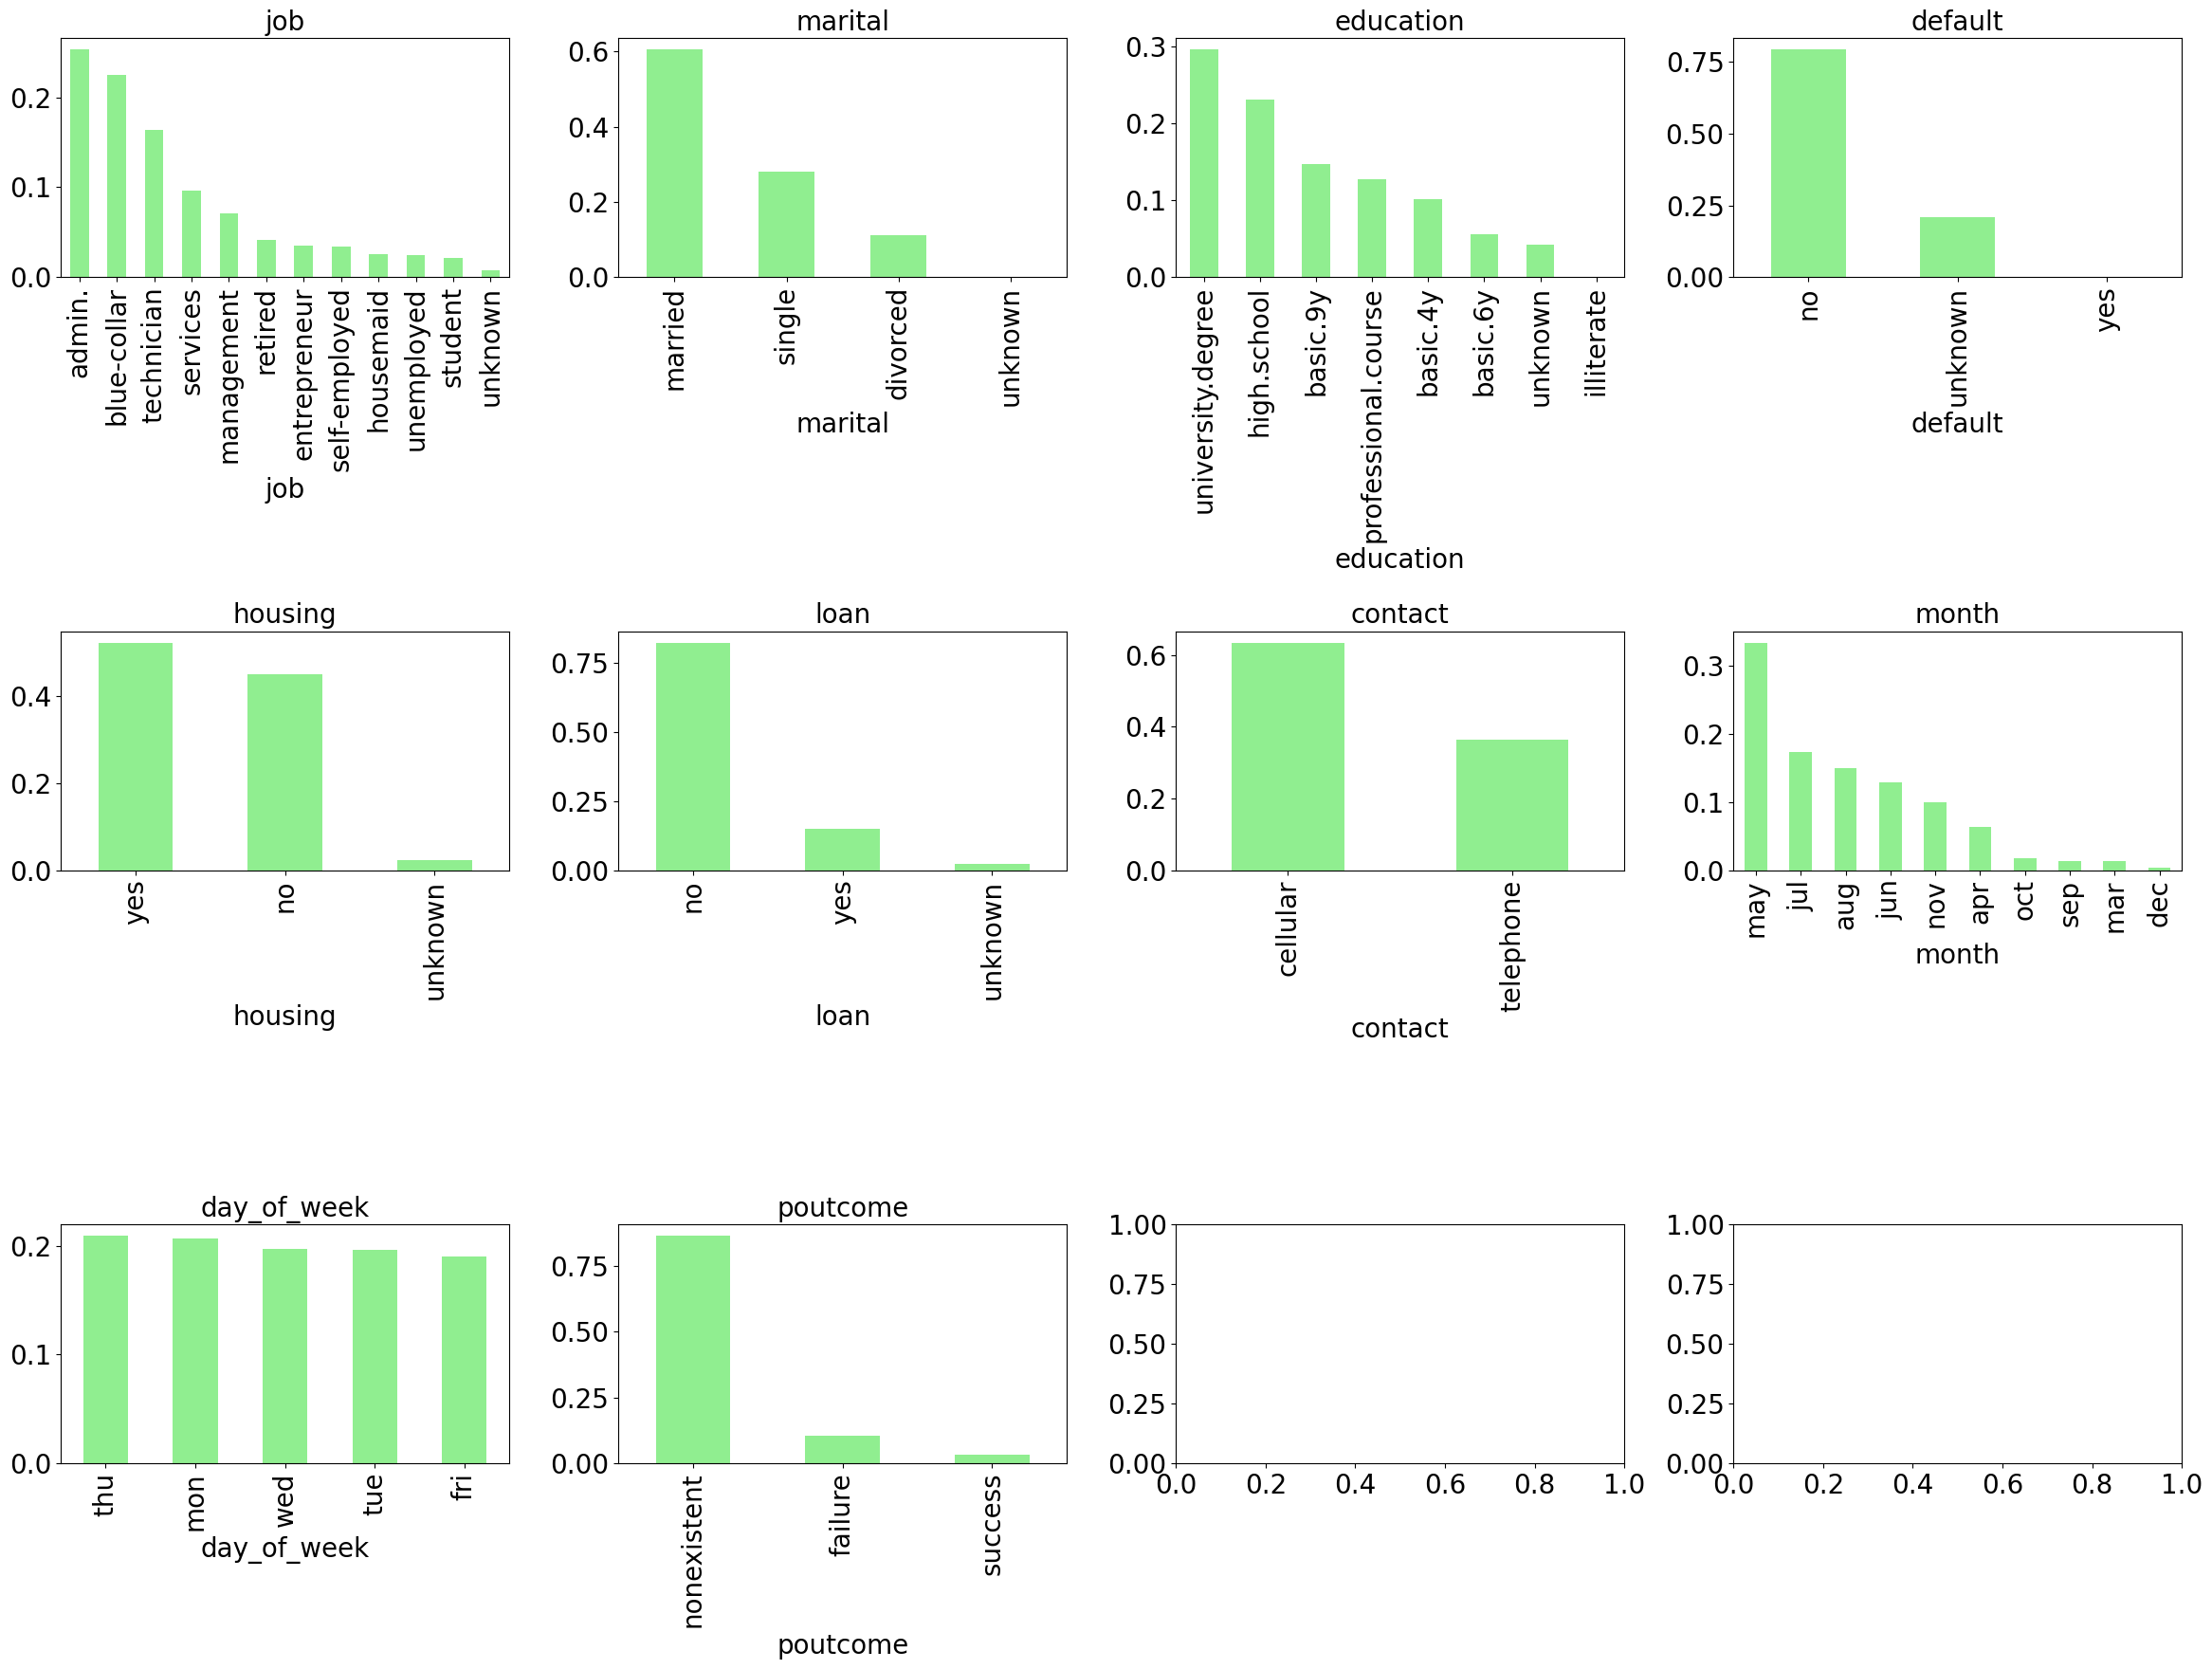

In [69]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20

fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df[categorical[i]].value_counts(normalize=True).plot(kind='bar', label=categorical[i], ax=axes[i//4, i%4], color='lightgreen')
    axes[i//4, i%4].set_title(categorical[i])
plt.tight_layout()


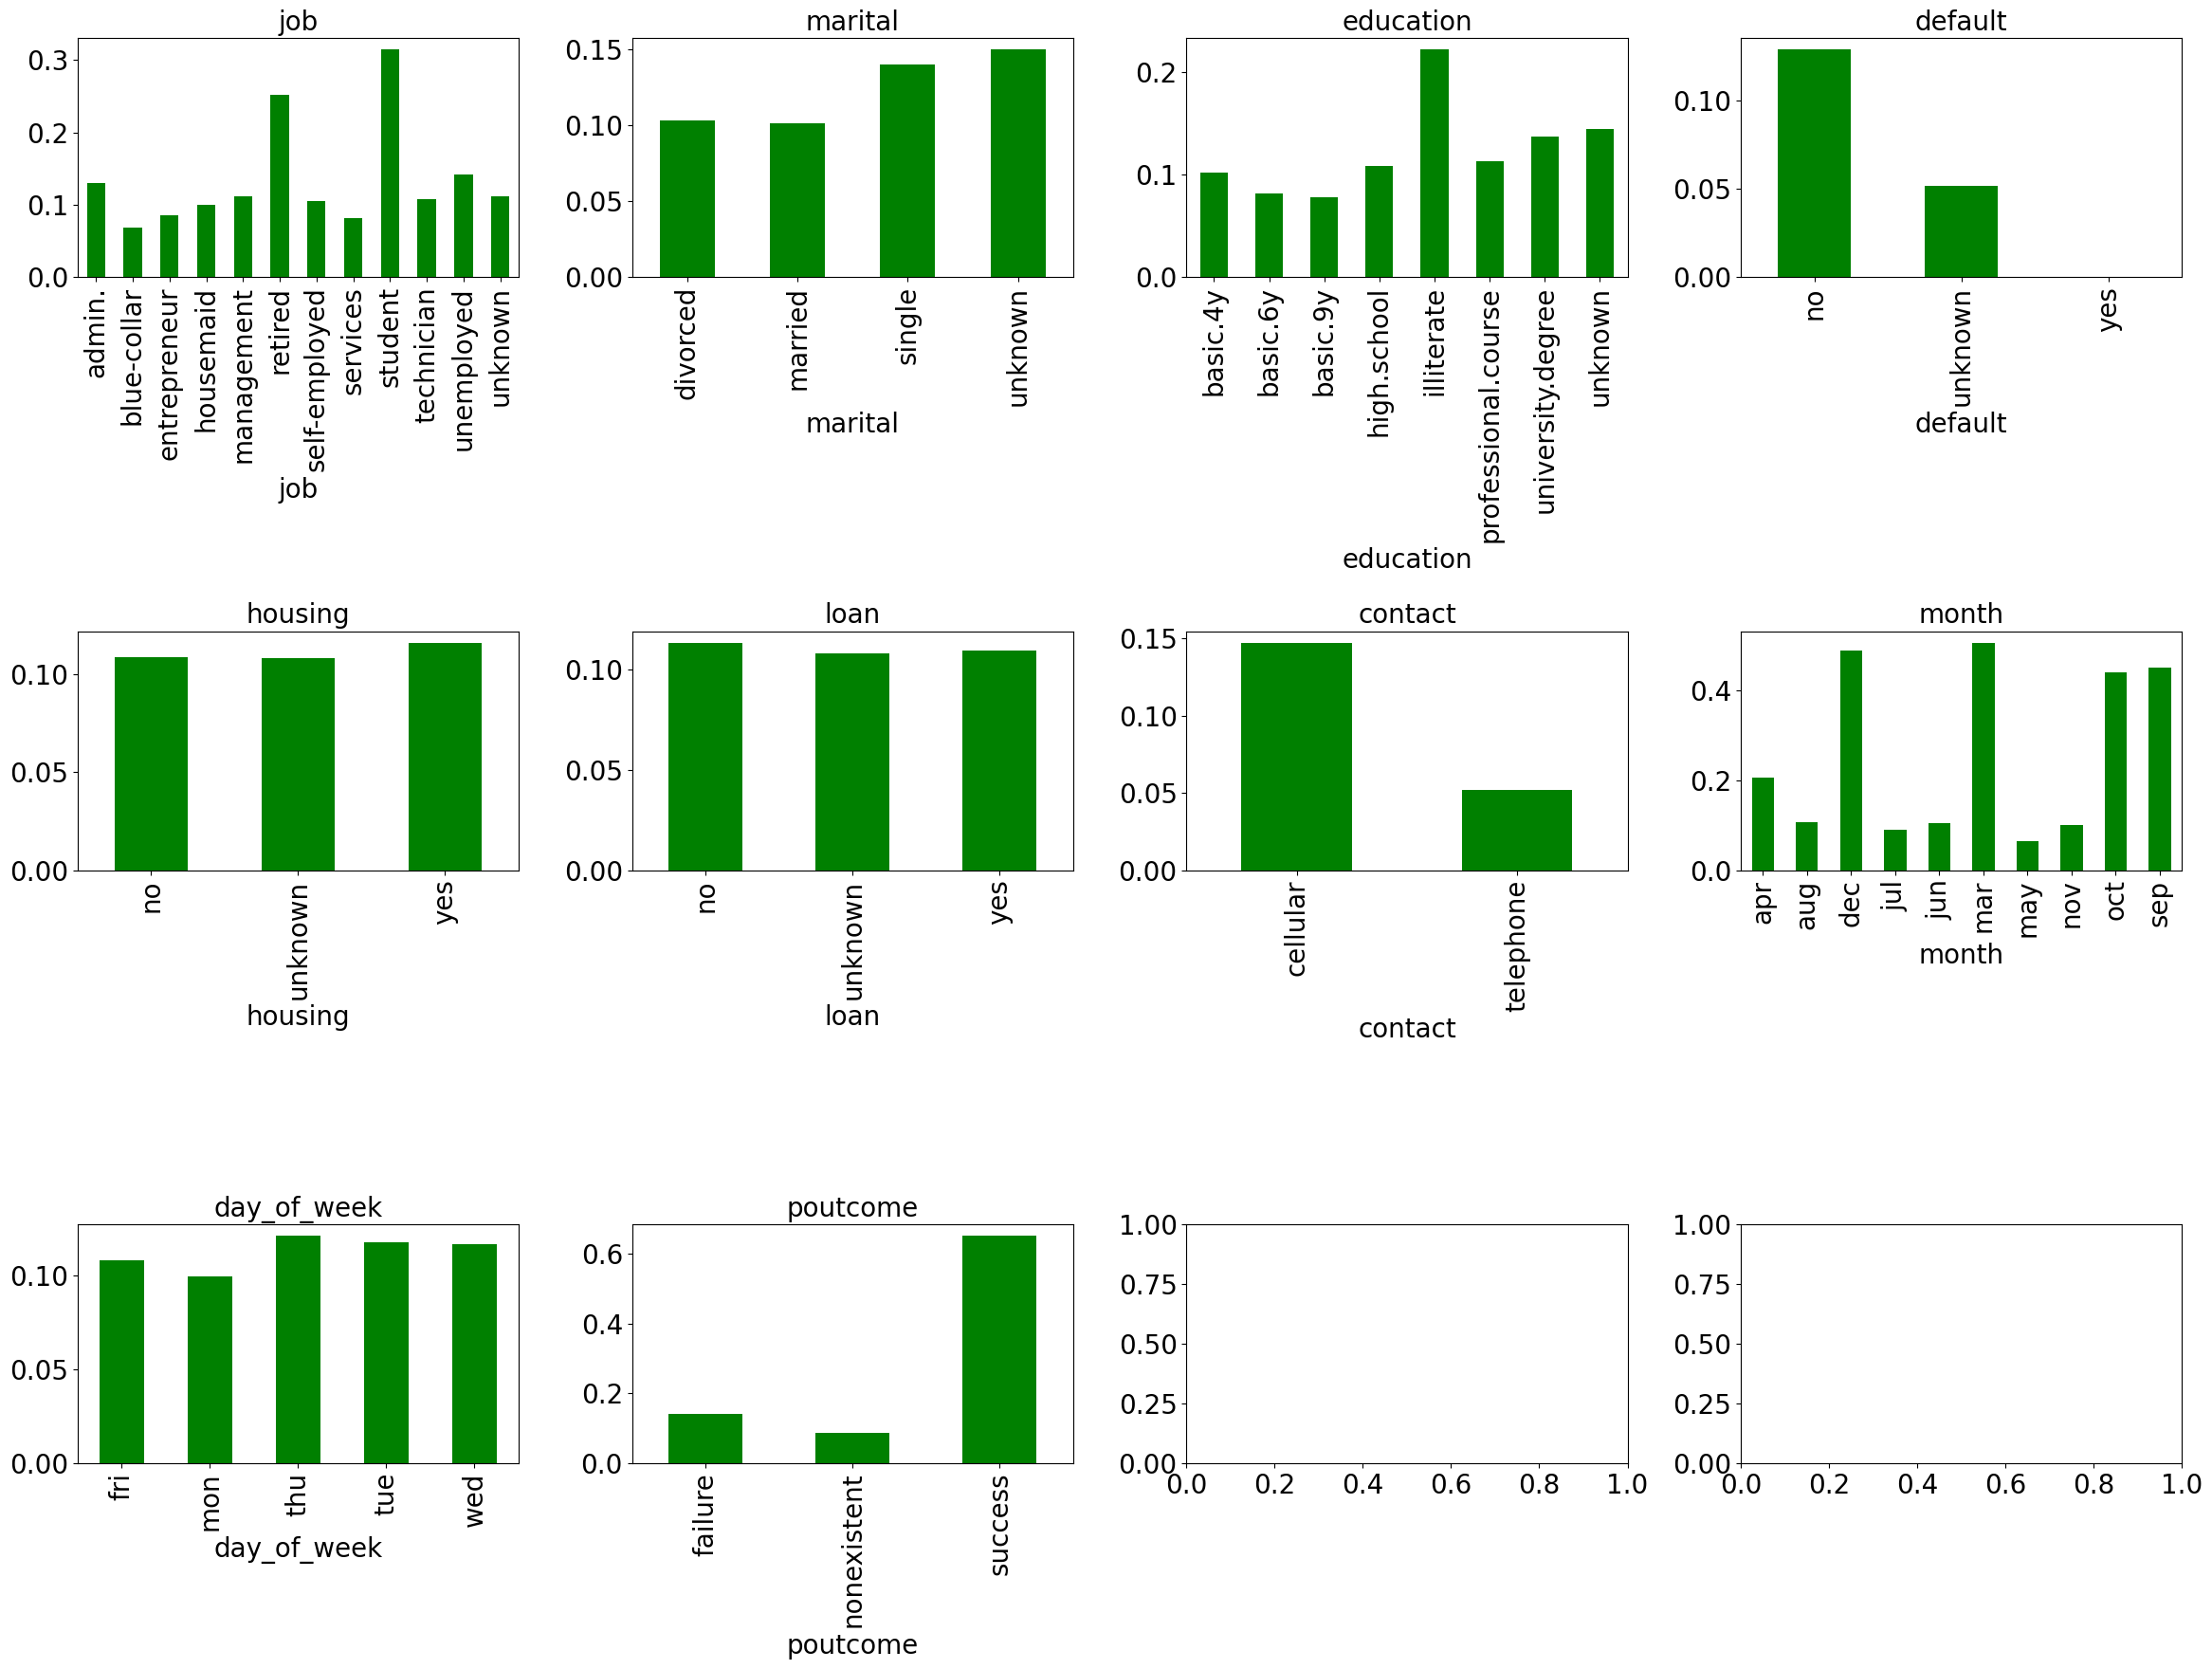

In [71]:
fig, axes = plt.subplots(ncols=4, nrows = 3, figsize=(24, 18))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

for i in range(len(categorical)):
    df.groupby(categorical[i])['y'].mean().plot(kind='bar', ax=axes[i//4, i%4], color='green')
    axes[i//4, i%4].set_title(categorical[i])

plt.tight_layout()

In [45]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


# Tasks 

### Let's compare the age of customers for the top 3 of the most common levels of education using a box plot.

<Axes: xlabel='age', ylabel='education'>

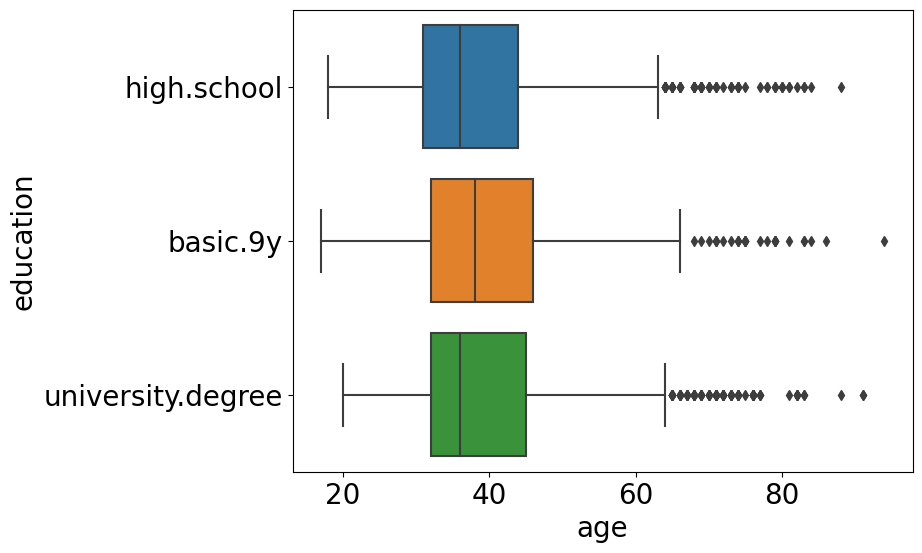

In [73]:
 
top_3 = (
    df.education.value_counts().sort_values(ascending=False).head(3).index.values
)
sns.boxplot(
    y="education", x="age", data=df[df.education.isin(top_3)], orient="h"
)